In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('NSE-Tata-Global-Beverages-Limited.csv')

In [3]:
df=df.sort_values(by=['Date'])

In [4]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [5]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83


In [6]:
df1=df.reset_index()['Close']

In [7]:
df1

0       155.80
1       155.55
2       160.15
3       160.05
4       159.45
         ...  
1230    230.90
1231    227.60
1232    218.20
1233    209.20
1234    215.15
Name: Close, Length: 1235, dtype: float64

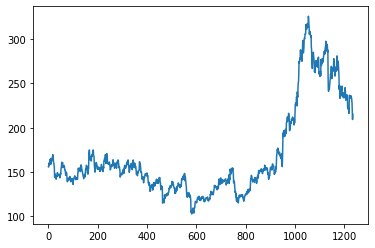

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [10]:
import numpy as np

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
print(df1)

[[0.23823398]
 [0.2371134 ]
 [0.25773196]
 ...
 [0.51792918]
 [0.47758853]
 [0.50425818]]


In [13]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.7)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size

(864, 371)

In [15]:
train_data

array([[0.23823398],
       [0.2371134 ],
       [0.25773196],
       [0.25728373],
       [0.25459435],
       [0.24831914],
       [0.2660242 ],
       [0.27588525],
       [0.2552667 ],
       [0.26535186],
       [0.25145675],
       [0.28148812],
       [0.27431645],
       [0.27162707],
       [0.26781712],
       [0.27947109],
       [0.27498879],
       [0.29157329],
       [0.29964142],
       [0.29112506],
       [0.27297176],
       [0.25862842],
       [0.25750784],
       [0.2415957 ],
       [0.23263111],
       [0.18668758],
       [0.18511878],
       [0.20192739],
       [0.18780816],
       [0.19139399],
       [0.18377409],
       [0.17548185],
       [0.17817122],
       [0.19206634],
       [0.19004931],
       [0.20170327],
       [0.20730614],
       [0.20909906],
       [0.19789332],
       [0.19229045],
       [0.19722098],
       [0.19520394],
       [0.19744509],
       [0.20080681],
       [0.19878978],
       [0.19766921],
       [0.19049753],
       [0.182

In [16]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(763, 100)
(763,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(270, 100)
(270,)


(None, None)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
from keras.callbacks import ModelCheckpoint

In [34]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [26]:
model=Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))
model.add(LSTM(60,activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(70,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 70)                36680     
_________________________________________________________________
dropout_6 (Dropout)          (None, 70)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                

In [26]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [35]:
#model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,callbacks=[checkpoint],batch_size=64,verbose=1)
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 605ms/step - loss: 0.0072 - val_loss: 0.1393
Epoch 2/100
12/12 [==============================] - 5s 458ms/step - loss: 0.0023 - val_loss: 0.0607
Epoch 3/100
12/12 [==============================] - 5s 440ms/step - loss: 0.0016 - val_loss: 0.0338
Epoch 4/100
12/12 [==============================] - 4s 314ms/step - loss: 0.0012 - val_loss: 0.0135
Epoch 5/100
12/12 [==============================] - 5s 446ms/step - loss: 0.0010 - val_loss: 0.0084
Epoch 6/100
12/12 [==============================] - 5s 455ms/step - loss: 9.8380e-04 - val_loss: 0.0076
Epoch 7/100
12/12 [==============================] - 4s 316ms/step - loss: 9.8144e-04 - val_loss: 0.0075
Epoch 8/100
12/12 [==============================] - 5s 421ms/step - loss: 9.5737e-04 - val_loss: 0.0107
Epoch 9/100
12/12 [==============================] - 5s 439ms/step - loss: 9.1834e-04 - val_loss: 0.0118
Epoch 10/100
12/12 [==============================] - 4s 295ms/step - loss:

12/12 [==============================] - 5s 378ms/step - loss: 2.2658e-04 - val_loss: 0.0027
Epoch 79/100
12/12 [==============================] - 5s 407ms/step - loss: 2.2110e-04 - val_loss: 0.0032
Epoch 80/100
12/12 [==============================] - 5s 411ms/step - loss: 2.1024e-04 - val_loss: 0.0036
Epoch 81/100
12/12 [==============================] - 4s 317ms/step - loss: 2.0985e-04 - val_loss: 0.0018
Epoch 82/100
12/12 [==============================] - 5s 415ms/step - loss: 2.0452e-04 - val_loss: 0.0027
Epoch 83/100
12/12 [==============================] - 5s 398ms/step - loss: 1.9871e-04 - val_loss: 0.0013
Epoch 84/100
12/12 [==============================] - 4s 300ms/step - loss: 1.9533e-04 - val_loss: 0.0032
Epoch 85/100
12/12 [==============================] - 5s 430ms/step - loss: 2.0511e-04 - val_loss: 0.0031
Epoch 86/100
12/12 [==============================] - 5s 419ms/step - loss: 2.1176e-04 - val_loss: 0.0018
Epoch 87/100
12/12 [==============================] - 4s 29

In [29]:
import tensorflow as tf

In [36]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [37]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [38]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

140.47684906981206

In [39]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

251.07370363825956

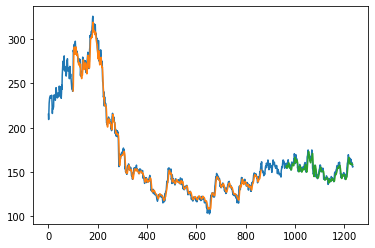

In [59]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [41]:
import xgboost as xgb

In [45]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [46]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [47]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 1000)

In [48]:
xg_reg.fit(X_train,y_train)

[08:25:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[08:26:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [49]:
preds = xg_reg.predict(X_test)

In [55]:
ytest_inv=scaler.inverse_transform(np.array(ytest).reshape(-1,1))

In [57]:
preds_inv=scaler.inverse_transform(np.array(preds).reshape(-1,1))

In [58]:
rmse = np.sqrt(mean_squared_error(ytest_inv, preds_inv))
print("RMSE: %f" % (rmse))

RMSE: 71.232997
